In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df.columns = ['Name','Age','Income']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [10]:
df.isna().sum()

Name      0
Age       0
Income    0
dtype: int64

# Preprocessing using Minmaxscaler

In [15]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Age', 'Income'], dtype='object')

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_columns])

df[numeric_columns] = scaler.transform(df[numeric_columns])

In [18]:
df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


# Elbow Method 

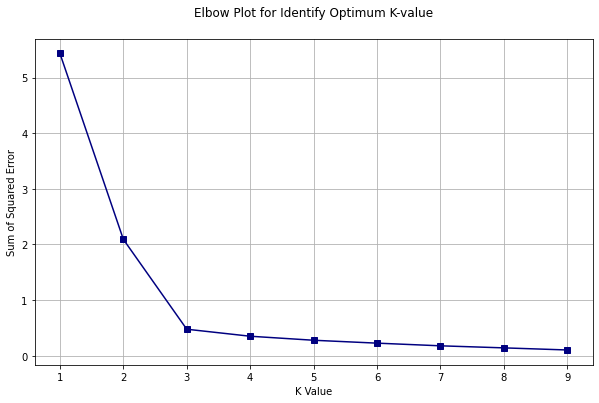

In [37]:
sum_squared_error = []
K_range = range(1,10)

for k in K_range:
    kmean = KMeans(n_clusters = k)
    kmean.fit(df[numeric_columns])
    sum_squared_error.append(kmean.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range,sum_squared_error, marker='s', color='navy')
plt.title("Elbow Plot for Identify Optimum K-value",y=1.05)
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Error")
plt.grid(True)    

# K Mean Apply

In [40]:
Optimum_K = 3

kmean = KMeans(n_clusters=Optimum_K)
Cluster_predicted = kmean.fit_predict(df[numeric_columns])
Cluster_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [42]:
df['Cluster'] = Cluster_predicted
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [43]:
kmean.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

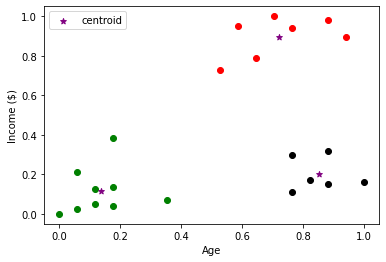

In [58]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

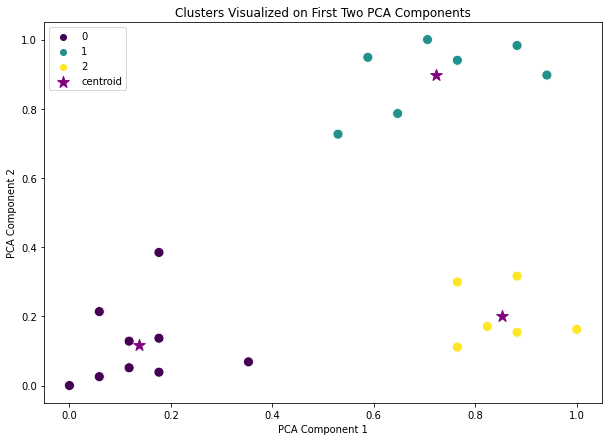

In [61]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=150)
plt.title('Clusters Visualized on First Two PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Cluster Wise Numeric Aggregation

In [69]:
df1 = pd.read_csv("income.csv")
df1.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [70]:
df1.columns = ["Name","Age","Income"]

In [71]:
df1['Cluster'] = Cluster_predicted

In [76]:
# Numeric aggregation
numeric_analysis = df1.groupby('Cluster', as_index=False)[numeric_columns].mean()
numeric_analysis = numeric_analysis[['Cluster','Age','Income']]
numeric_analysis.round(2)

,Cluster,Age,Income
0,0,28.33,58611.11
1,1,38.29,150000.00
2,2,40.50,68666.67
